In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

In [115]:
df=pd.read_csv('/content/Telco_Data_With_Tax_Gateway_Updated.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gateway,tax,charges,sim
3927,4390-KYULV,Male,0,Yes,No,3,Yes,No,No,No internet service,...,Month-to-month,Yes,Credit card (automatic),20.55,51.15,Yes,Disabled,No,16.97,Jio
5092,5774-XZTQC,Female,0,Yes,Yes,7,Yes,No,No,No internet service,...,Month-to-month,No,Mailed check,20.45,150.75,No,Disabled,No,15.84,Vi
6419,3865-ZYKAD,Male,1,Yes,No,69,Yes,Yes,Fiber optic,Yes,...,Month-to-month,Yes,Credit card (automatic),84.90,5785.65,No,Enabled,Yes,80.85,Jio
3811,3620-MWJNE,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,54.45,87.3,No,Enabled,Yes,50.19,Vi
2027,3778-FOAQW,Female,0,Yes,No,24,Yes,No,No,No internet service,...,One year,No,Mailed check,20.15,456.85,No,Disabled,No,24.08,BSNL
3523,0378-CJKPV,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Two year,No,Credit card (automatic),112.10,7965.95,No,Enabled,Yes,108.59,Vi
6823,7009-LGECI,Female,0,No,No,4,Yes,No,DSL,Yes,...,Month-to-month,Yes,Bank transfer (automatic),50.55,235.65,No,Enabled,Yes,46.53,Airtel
5444,1833-TCXKK,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Bank transfer (automatic),107.75,4882.8,No,Enabled,Yes,105.87,BSNL
6093,7110-BDTWG,Female,0,Yes,No,71,No,No phone service,DSL,No,...,Two year,Yes,Electronic check,47.05,3263.6,No,Enabled,Yes,45.70,Vi
2723,1866-ZSLJM,Male,0,No,No,21,Yes,No,No,No internet service,...,Month-to-month,No,Credit card (automatic),20.50,402.85,No,Disabled,No,21.22,Airtel


In [116]:
df = df.drop(['customerID'], axis=1)



In [117]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gateway,tax,charges,sim
5522,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,70.15,70.15,Yes,Enabled,Yes,69.50,Airtel
1795,Female,0,Yes,No,19,Yes,Yes,Fiber optic,No,No,...,Month-to-month,No,Mailed check,89.65,1761.05,Yes,Enabled,Yes,89.41,Airtel
1066,Male,0,Yes,No,47,Yes,No,No,No internet service,No internet service,...,Two year,No,Mailed check,19.65,973.1,No,Disabled,No,18.47,Jio
3393,Male,0,Yes,No,62,Yes,Yes,Fiber optic,No,No,...,Two year,Yes,Bank transfer (automatic),107.60,6912.7,No,Enabled,Yes,111.99,Jio
4402,Male,0,No,No,39,No,No phone service,DSL,Yes,Yes,...,Month-to-month,Yes,Credit card (automatic),48.95,1880.85,Yes,Enabled,Yes,45.38,Jio
5588,Male,0,No,No,1,Yes,No,DSL,No,No,...,Month-to-month,Yes,Mailed check,49.65,49.65,Yes,Enabled,Yes,53.84,Airtel
3639,Female,1,Yes,No,60,Yes,Yes,Fiber optic,No,No,...,One year,Yes,Credit card (automatic),100.50,6029,No,Enabled,Yes,104.53,Vi
2532,Female,1,No,No,41,Yes,No,Fiber optic,No,No,...,One year,Yes,Bank transfer (automatic),101.10,4016.2,No,Enabled,Yes,102.38,Jio
6726,Female,1,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,No,Electronic check,70.75,154.85,Yes,Enabled,Yes,72.83,Vi
3874,Female,0,No,No,9,Yes,No,DSL,No,No,...,Month-to-month,Yes,Electronic check,43.75,405.7,No,Enabled,Yes,41.07,Jio


In [118]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})


In [119]:
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gateway,tax,charges,sim
1374,Male,No,Yes,Yes,45,Yes,No,DSL,Yes,Yes,...,Two year,Yes,Mailed check,84.35,3858.05,No,Enabled,Yes,83.86,Airtel


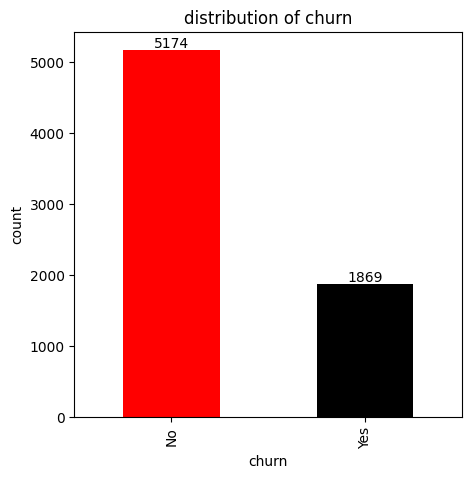

In [120]:
 # visualization for churn counts
            #================================================
churn_count=df['Churn'].value_counts()
plt.figure(figsize = (5,5))
ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('churn')
plt.ylabel('count')
plt.title('distribution of churn')
plt.show()

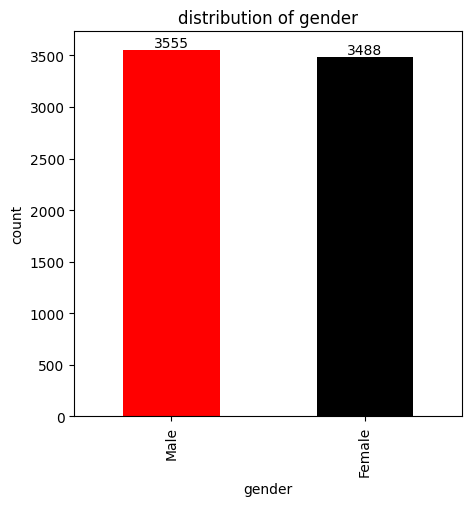

In [121]:
# visualization for gender
gender_count=df['gender'].value_counts()
plt.figure(figsize = (5,5))
ax=gender_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])
plt.xlabel('gender')
plt.ylabel('count')
plt.title('distribution of gender')
plt.show()

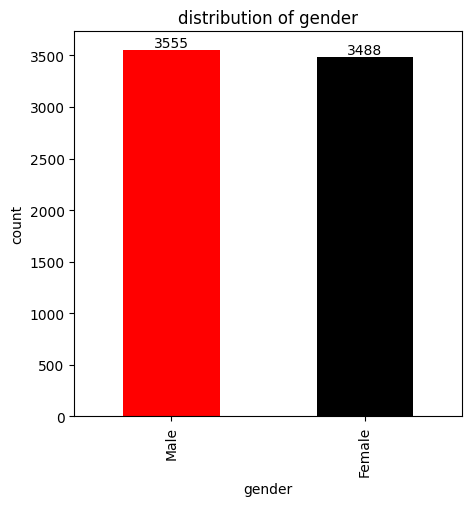

In [122]:
# visualization for gender
df['gender'].value_counts()
plt.figure(figsize = (5,5))
ax=df['gender'].value_counts().plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])
plt.xlabel('gender')
plt.ylabel('count')
plt.title('distribution of gender')
plt.show()

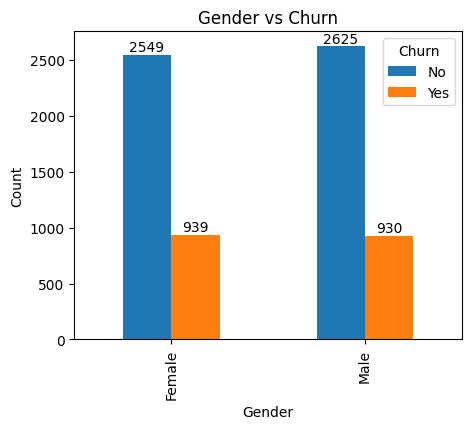

In [123]:
#================= distrubution between grender and churn
gender_churn = pd.crosstab(df['gender'], df['Churn'])

ax = gender_churn.plot(kind='bar', figsize=(5, 4))

# add labels to BOTH containers
for container in ax.containers:
  ax.bar_label(container)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Churn')
plt.show()

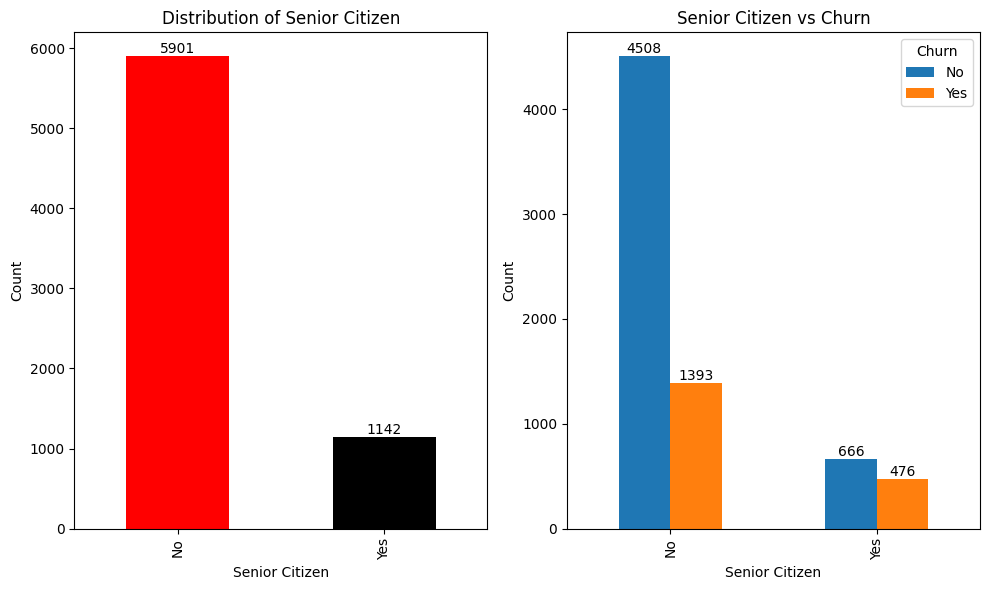

In [124]:
plt.figure(figsize=(10, 6))

# -------- Subplot 1: Senior Citizen distribution --------
ax1 = plt.subplot(1, 2, 1)
df['SeniorCitizen'].value_counts().plot(
    kind='bar',
    color=['r', 'black'],
    ax=ax1
)

for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_title('Distribution of Senior Citizen')
ax1.set_xlabel('Senior Citizen')
ax1.set_ylabel('Count')


# -------- Subplot 2: Senior Citizen vs Churn --------
ax2 = plt.subplot(1, 2, 2)

senior_citizen_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'])
senior_citizen_churn.plot(
    kind='bar',
    ax=ax2
)

for container in ax2.containers:
    ax2.bar_label(container)

ax2.set_title('Senior Citizen vs Churn')
ax2.set_xlabel('Senior Citizen')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


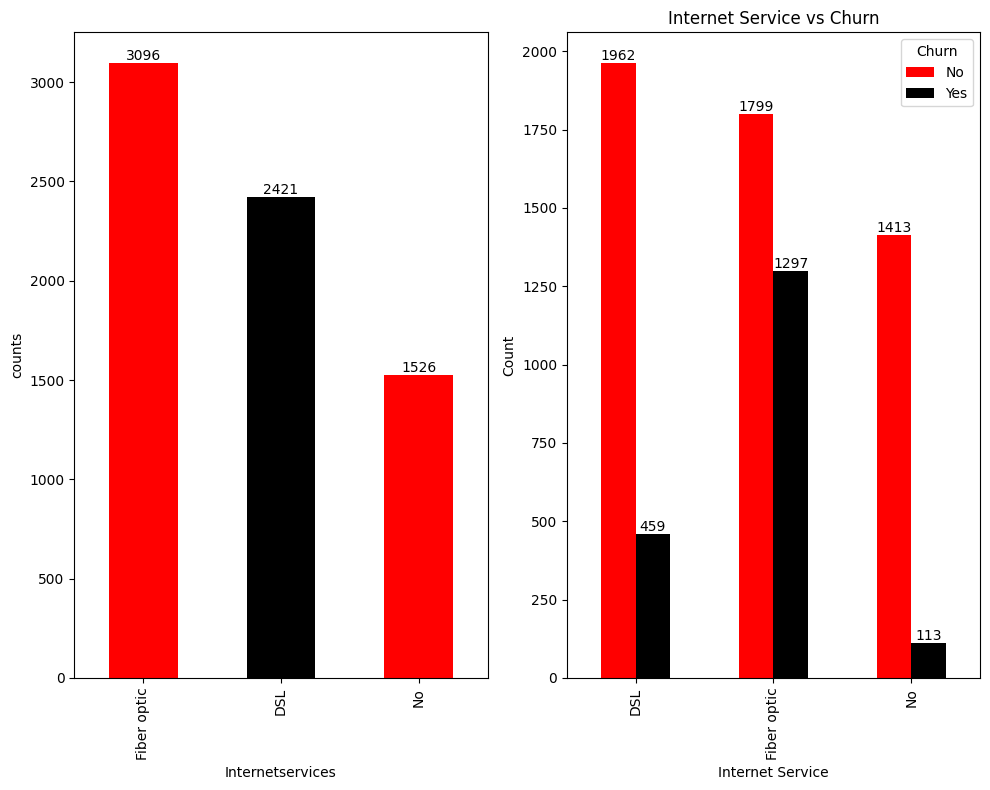

In [125]:
# distribution between InternetService
plt.figure(figsize=(10,8))
InternetService_count=df['InternetService'].value_counts()
plt.subplot(1,2,1)
ax=InternetService_count.plot(kind='bar',color=['r','black'])
ax.bar_label(ax.containers[0])
plt.xlabel('Internetservices')
plt.ylabel('counts')


ax = plt.subplot(1, 2, 2)

Internetservice_churn = pd.crosstab(df['InternetService'], df['Churn'])

Internetservice_churn.plot(kind='bar',ax=ax,color=['r','black','b'])

for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Internet Service vs Churn')
ax.set_xlabel('Internet Service')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


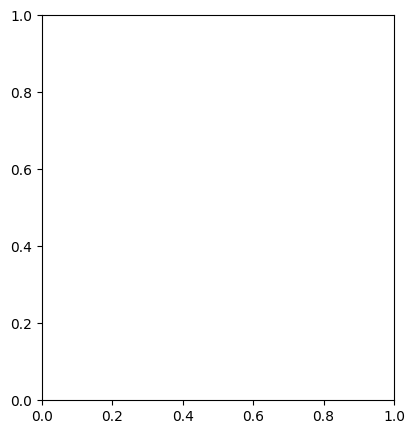

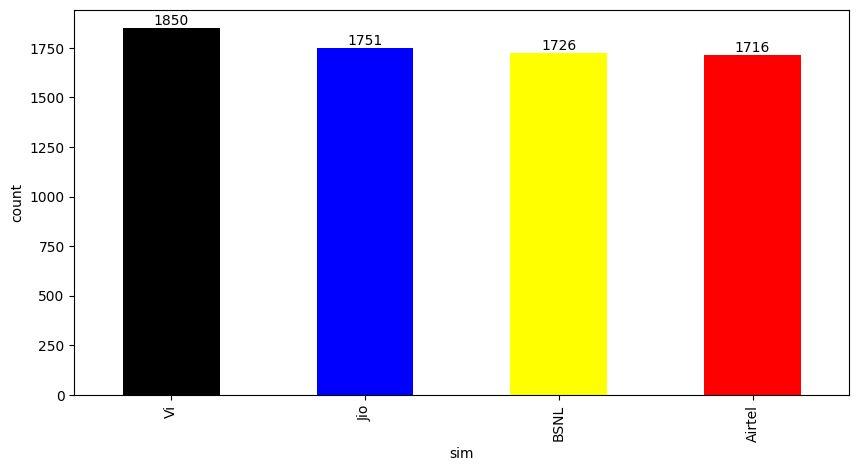

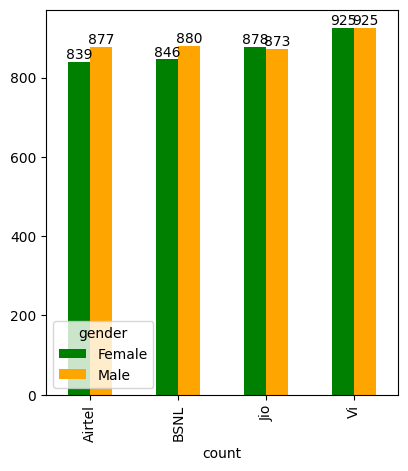

In [126]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.figure(figsize=(10,5))
sim_count=df['sim'].value_counts()
ax=sim_count.plot(kind='bar',color=['black','blue','yellow','red'])
ax.bar_label(ax.containers[0])
plt.xlabel('sim')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,2)
Sim_gender_count=pd.crosstab(df['sim'],df['gender'])
Sim_gender_count.plot(kind='bar',ax=ax,color=['g','orange'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('sim vs gender')
ax.set_xlabel('count')
plt.show()




<Figure size 1500x800 with 0 Axes>

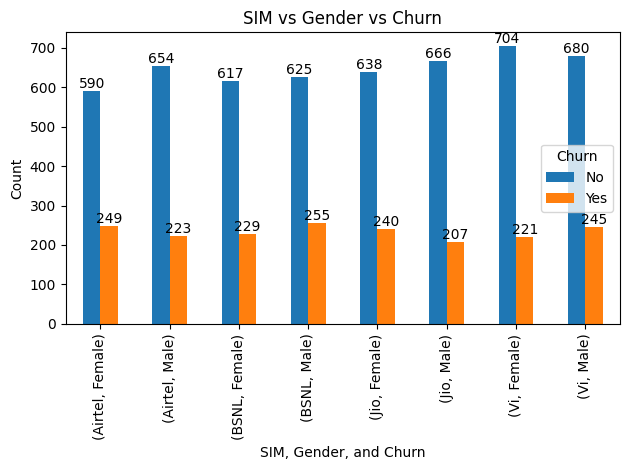

In [127]:
plt.figure(figsize=(15, 8))

Sim_gender_churn = (
    df.groupby(['sim', 'gender', 'Churn'])
      .size()
      .unstack(fill_value=0)
)

ax = Sim_gender_churn.plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

ax.set_xlabel('SIM, Gender, and Churn')
ax.set_ylabel('Count')
ax.set_title('SIM vs Gender vs Churn')

plt.tight_layout()
plt.show()


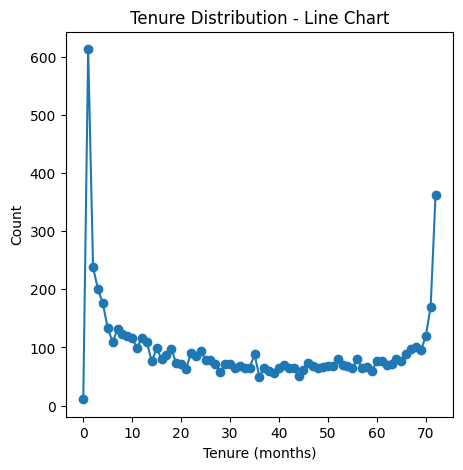

In [128]:
import matplotlib.pyplot as plt

tenure_counts = df['tenure'].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.plot(tenure_counts.index, tenure_counts.values, marker='o', linestyle='-')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Tenure Distribution - Line Chart')
plt.show()



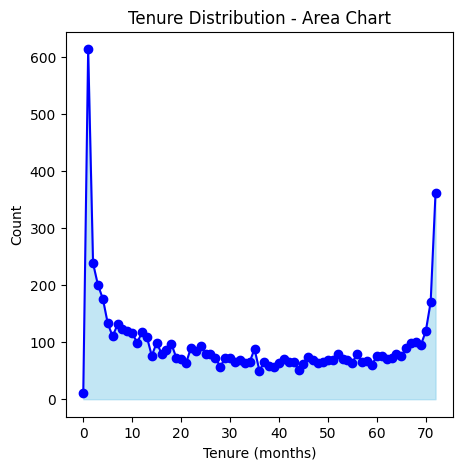

In [129]:
plt.figure(figsize=(5,5))
plt.fill_between(tenure_counts.index, tenure_counts.values, color='skyblue', alpha=0.5)
plt.plot(tenure_counts.index, tenure_counts.values, marker='o', color='blue')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Tenure Distribution - Area Chart')
plt.show()


In [130]:
df['tenure'].mean()


np.float64(32.37114865824223)

In [131]:
df['tenure'].max()

72

In [132]:
df['tenure'].min()

0

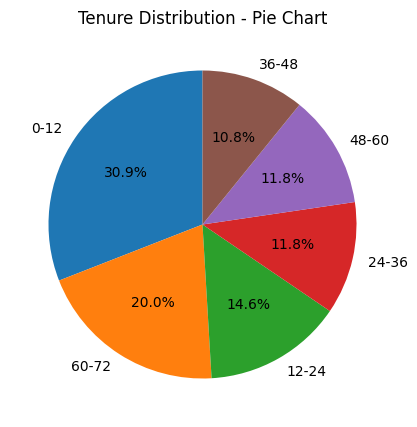

In [133]:
tenure_grouped = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-12','12-24','24-36','36-48','48-60','60-72'])
tenure_counts = tenure_grouped.value_counts()

plt.figure(figsize=(5,5))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tenure Distribution - Pie Chart')
plt.show()


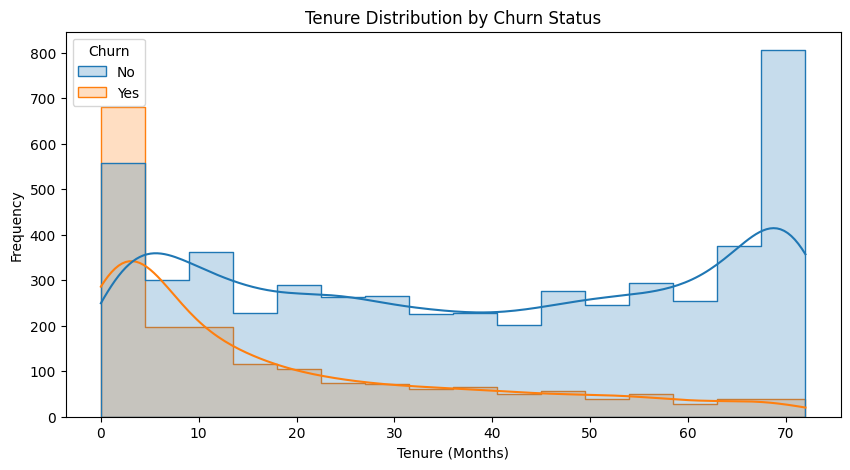

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Use the original DataFrame 'df' instead of the crosstab
# hue='Churn' separates the data into two distributions
# kde=True adds the trend line you requestedell
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step')

plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


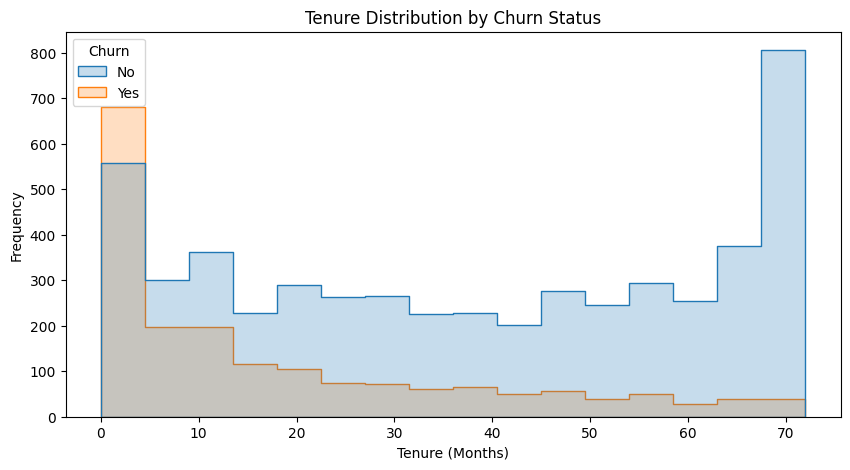

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    kde=False,
    element='step'
)

plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


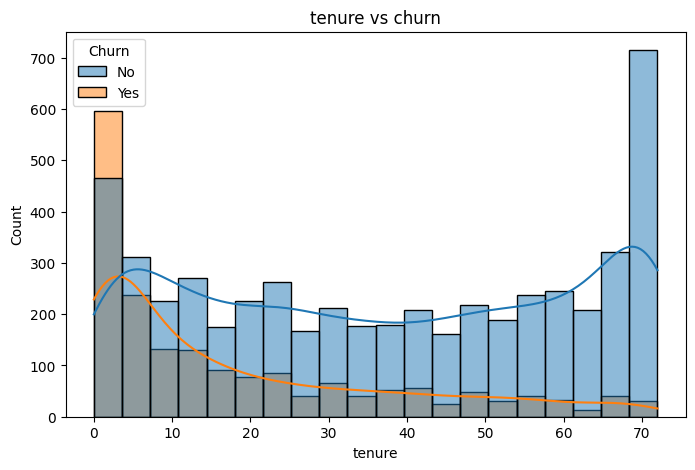

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=20,
    kde=True
)

plt.title('tenure vs churn')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.show()


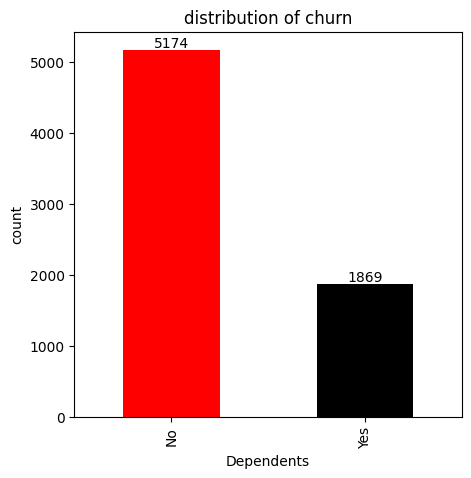

In [138]:
 # visualization for churn counts
            #================================================
distribution_count=df['Dependents'].value_counts()
plt.figure(figsize = (5,5))
ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('Dependents')
plt.ylabel('count')
plt.title('distribution of churn')
plt.show()


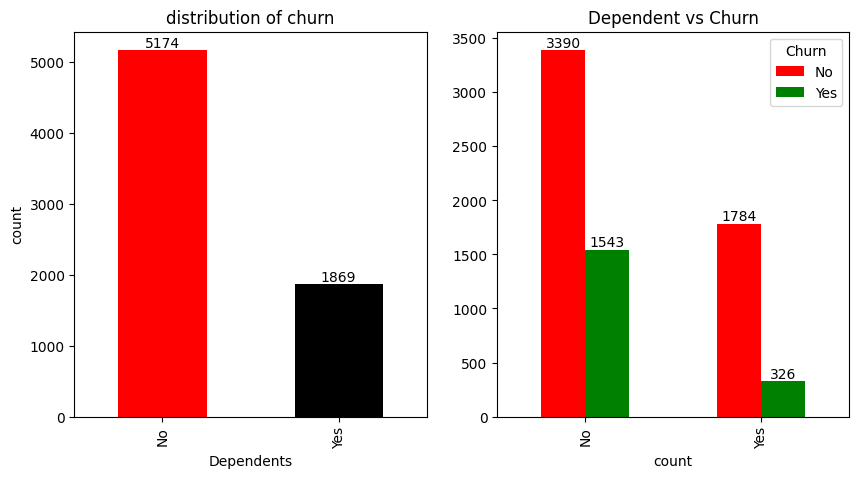

In [139]:

 # visualization for churn counts
            #================================================
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
distribution_count=df['Dependents'].value_counts()

ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('Dependents')
plt.ylabel('count')
plt.title('distribution of churn')


ax=plt.subplot(1,2,2)
Dependents_Churn_count=pd.crosstab(df['Dependents'],df['Churn'])
Dependents_Churn_count.plot(kind='bar',ax=ax,color=['red','green'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('Dependents vs Churn')
ax.set_xlabel('count')
ax.set_title('Dependent vs Churn')
plt.show()


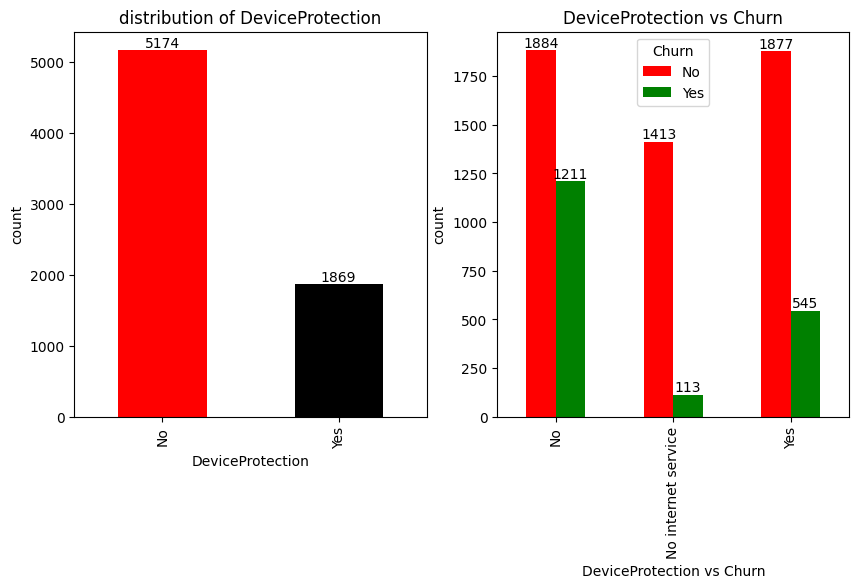

In [140]:
 # visualization for deviceprotection with represent to churn
            #================================================
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
DeviceProtection_count=df['DeviceProtection'].value_counts()

ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('DeviceProtection')
plt.ylabel('count')
plt.title('distribution of DeviceProtection')


ax=plt.subplot(1,2,2)
DeviceProtection_Churn_count=pd.crosstab(df['DeviceProtection'],df['Churn'])
DeviceProtection_Churn_count.plot(kind='bar',ax=ax,color=['red','green'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('DeviceProtection vs Churn')
ax.set_ylabel('count')
ax.set_title('DeviceProtection vs Churn')
plt.show()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


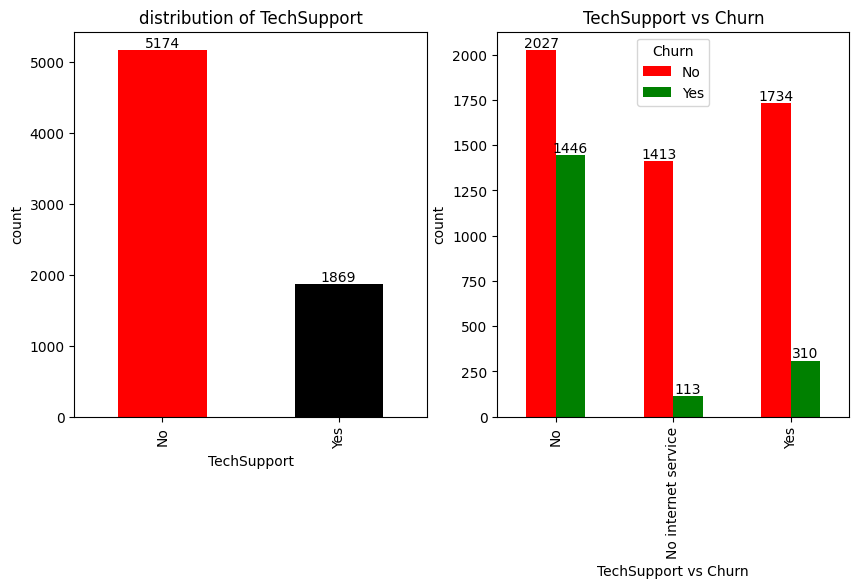

In [142]:
 # visualization for Techsupport with represent to churn
            #================================================
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
TechSupport_count=df['TechSupport'].value_counts()

ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('TechSupport')
plt.ylabel('count')
plt.title('distribution of TechSupport')


ax=plt.subplot(1,2,2)
TechSupport_Churn_count=pd.crosstab(df['TechSupport'],df['Churn'])
TechSupport_Churn_count.plot(kind='bar',ax=ax,color=['red','green'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('TechSupport vs Churn')
ax.set_ylabel('count')
ax.set_title('TechSupport vs Churn')
plt.show()

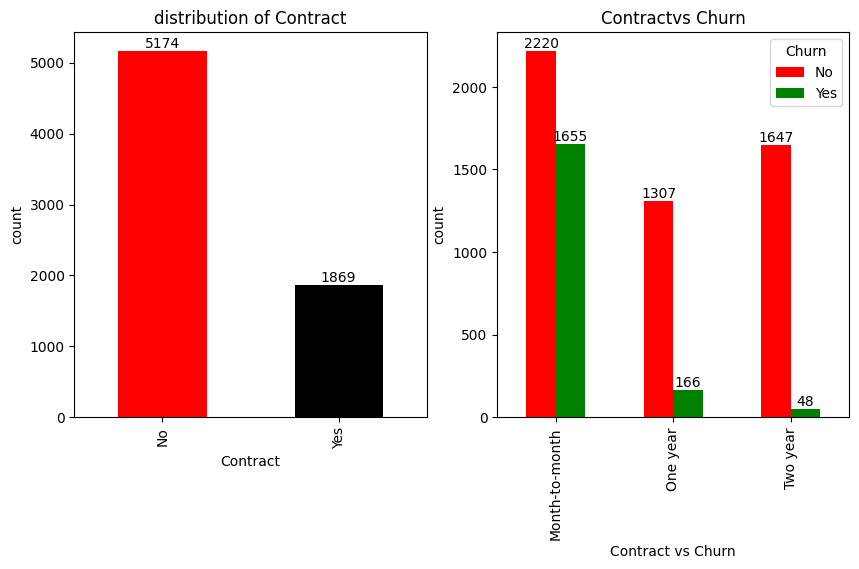

In [143]:
 # visualization for contract with represent to churn
            #================================================
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
Contract_count=df['Contract'].value_counts()

ax=churn_count.plot(kind='bar', color=['r', 'black'])
ax.bar_label(ax.containers[0])

plt.xlabel('Contract')
plt.ylabel('count')
plt.title('distribution of Contract')


ax=plt.subplot(1,2,2)
Contract_Churn_count=pd.crosstab(df['Contract'],df['Churn'])
Contract_Churn_count.plot(kind='bar',ax=ax,color=['red','green'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('Contract vs Churn')
ax.set_ylabel('count')
ax.set_title('Contractvs Churn')
plt.show()

In [144]:
# monthlychargers
df['MonthlyCharges'].max()


118.75

In [145]:
df['MonthlyCharges'].min()

18.25

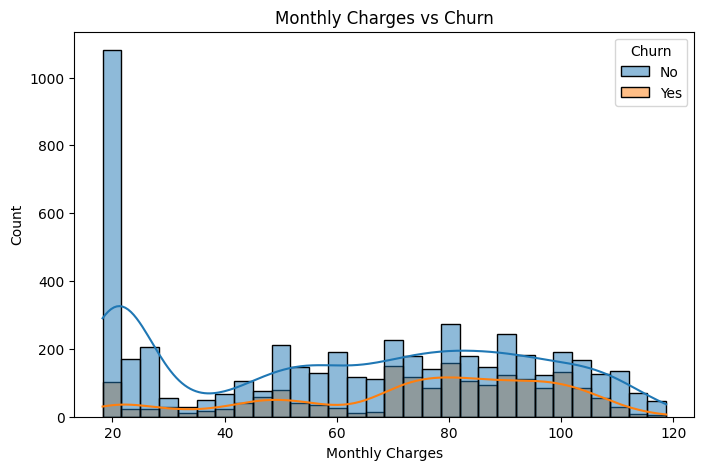

In [149]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    bins=30,
    kde=True
)

plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


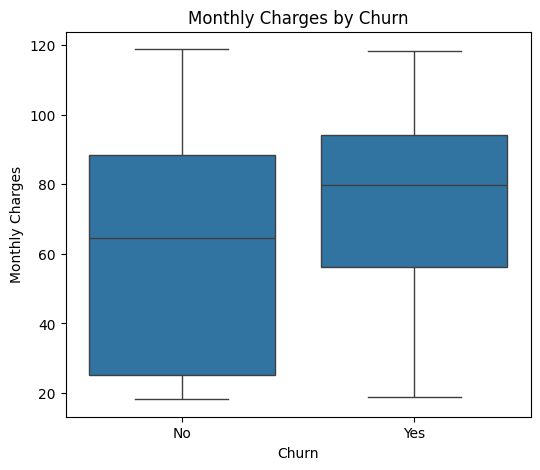

In [150]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges'
)

plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

